In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Primera Parte

a. Encuentre el número óptimo del clusters en el dataset dengue usando como features 'humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin' El dataset set puede bajar de esta pagina https://vincentarelbundock.github.io/Rdatasets/datasets.html Utilice http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html para encontrar los clusters.

In [2]:
data = pd.read_csv('dengue.csv')
Data = data.dropna()
X = Data[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']]

In [3]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

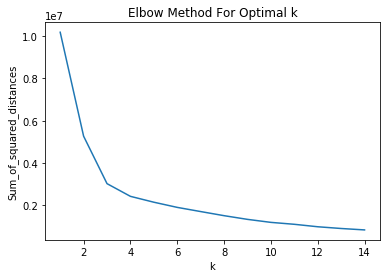

In [4]:
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

El optimo esta en k=3

# Segunda Parte

b. Utilizando el siguiente dataset https://www.kaggle.com/xvivancos/transactions-from-a-bakery encuentre patrones de compras a partir de métodos PCA y k-mean clustering.

In [5]:
datos = pd.read_csv('BreadBasket_DMS.csv')
Datos = datos.dropna()
X = np.array(Datos[['Date', 'Time', 'Transaction', 'Item']])

In [6]:
# XX es un array con los datos transformados 
XX = np.reshape(np.zeros(X.shape[0]*X.shape[1]), (X.shape[0],X.shape[1]))

for i in range(X.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(X[:,i])
    XX[:,i] = le.transform(X[:,i])

In [7]:
# Kmeans para buscar el numero optimo de clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(XX)
    Sum_of_squared_distances.append(km.inertia_)

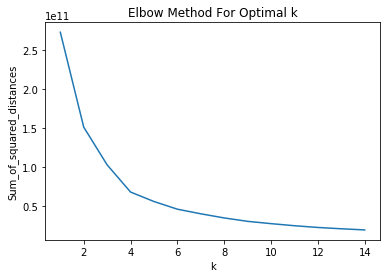

In [8]:
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

el k optimo aca esta mas o menos en k=3

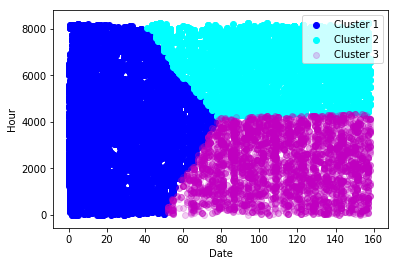

In [9]:
# Kmeans 
km = KMeans(n_clusters=3)
km = km.fit(XX)
y_predict_kmeans = km.fit_predict(XX)

plt.scatter(XX[y_predict_kmeans == 0,0], XX[y_predict_kmeans == 0,1], c='b', label='Cluster 1')
plt.scatter(XX[y_predict_kmeans == 1,0], XX[y_predict_kmeans == 1,1], c='cyan', label='Cluster 2')
plt.scatter(XX[y_predict_kmeans == 2,0], XX[y_predict_kmeans == 2,1], c='m', label='Cluster 3', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Hour')
plt.legend(loc=1)

La grafica de arriba tiene sentido, pues quiere decie que a todas horas del dia se compran todos los productos del cluster 1, pero las compras de los clusters 2 y 3 dependen de la hora

In [10]:
# PCA para encontrar componentes que explican el 80% de la varianza 
scaler = StandardScaler()
XX = scaler.fit_transform(XX)

pca = PCA(n_components=XX.shape[1], whiten=True)
pca.fit(XX)
perc_var = pca.explained_variance_ratio_
principal_components = pca.fit_transform(XX)
components = pca.components_

[5.02017382e-01 2.58780101e-01 2.39050211e-01 1.52305631e-04]
0.7607974831155133


Text(0, 0.5, 'Cumulative Prop. Variance Explained')

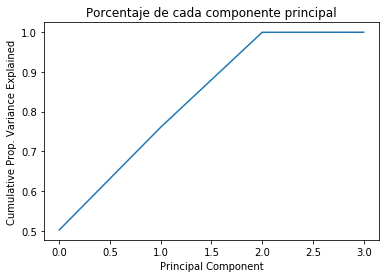

In [11]:
# Porcentaje de la varianza explicado por cada componente
print(perc_var)
# Suma do los porcentajes de los primeros dos componentes
print(perc_var[0]+perc_var[1])

# Grafica
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Porcentaje de cada componente principal')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')

Text(0.5, 1.0, 'Primeras componentes que explican 78 % de la varianza')

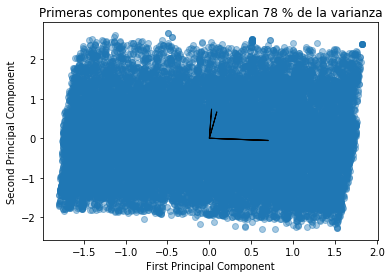

In [12]:
for i in range(components.shape[1]):
    plt.arrow(0, 0, components[0,i], components[1,i], length_includes_head=True)

plt.scatter(principal_components[:,0], principal_components[:,1], alpha=0.4)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Primeras componentes que explican 78 % de la varianza')